# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Read example data
data = pd.read_csv("datasets/college_admission.txt", header=None)

# Convert and split data into numpy arrays
X = np.asarray(data.iloc[:,0:2])
y = np.asarray(data.iloc[:,2])

In [5]:
# Get dimensions of training set
m, n = X.shape

In [6]:
from algorithms.logistic_regression import *

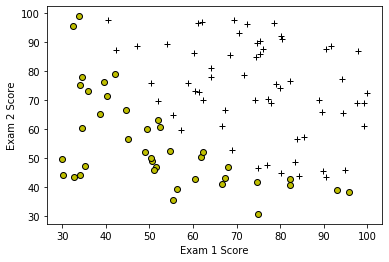

In [7]:
# Scatter plot of original dataset
plot_data(X, y)

In [8]:
# Initialize default values
theta = np.zeros(n + 1)
iterations = 1500
alpha = 0.01

In [9]:
# Add a column of ones to X to account for theta 0
X = np.concatenate((np.ones((m, 1)), X), axis=1)

In [10]:
# Compute cost with initial parameters
cost = compute_cost(X, y, theta)

In [11]:
# Minimize cost function with respect to theta using Nelder-Mead
wrapped = lambda theta_min: compute_cost(X, y, theta_min)[0]
result = opt.minimize(wrapped, theta, method='Nelder-Mead', options={"maxiter": 400})

theta = result.x
cost = result.fun

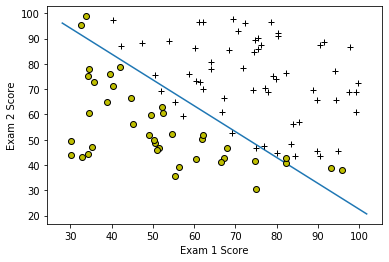

In [12]:
# Scatter plot of original dataset with decision boundary
plot_x = np.array([X[:, 1].min() - 2, X[:, 1].max() + 2])
plot_y = (-theta[0] - theta[1] * plot_x) / theta[2]
plt.plot(plot_x, plot_y)
plot_data(X[:, 1:], y)

In [15]:
# Predict admission probability based on a student's scores
prob = sigmoid(np.array([1, 45, 85]) @ theta)
print("For a student with scores 45 and 85, the model predicts an admission probability of {}".format(prob))

For a student with scores 45 and 85, the model predicts an admission probability of 0.7762915904112411


In [16]:
# Calculate accuracy of training set
predictions = predict(theta, X)
print("Train Accuracy: {}".format(np.mean(predictions == y) * 100))
print("Expected Accuracy (approx): 89.0\n")

Train Accuracy: 89.0
Expected Accuracy (approx): 89.0

